
![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [7]:
#Incluyo las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [14]:
df.info()
#Podemos ver que no tenemos ningun valor NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

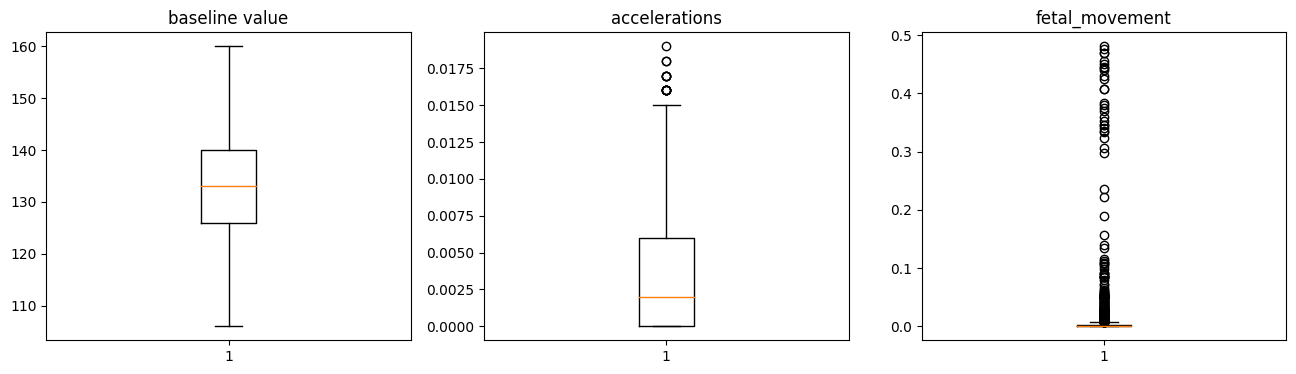

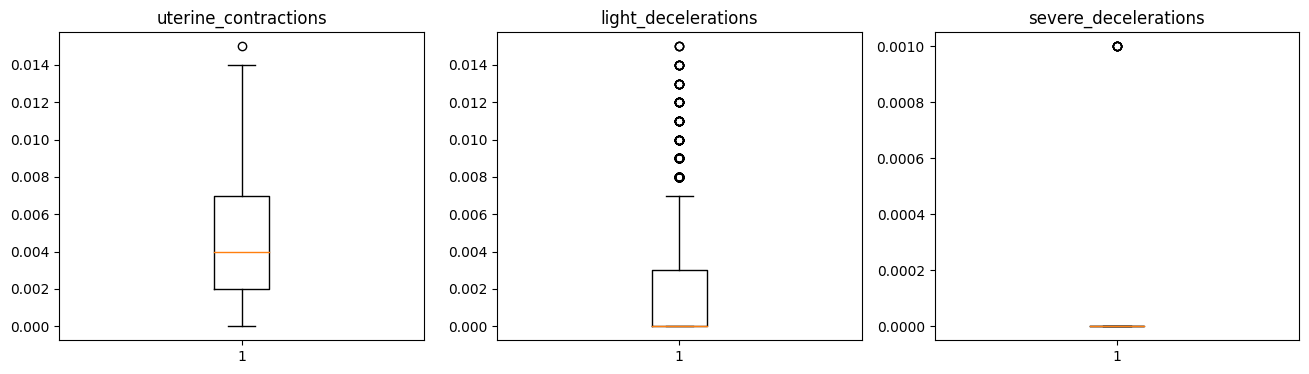

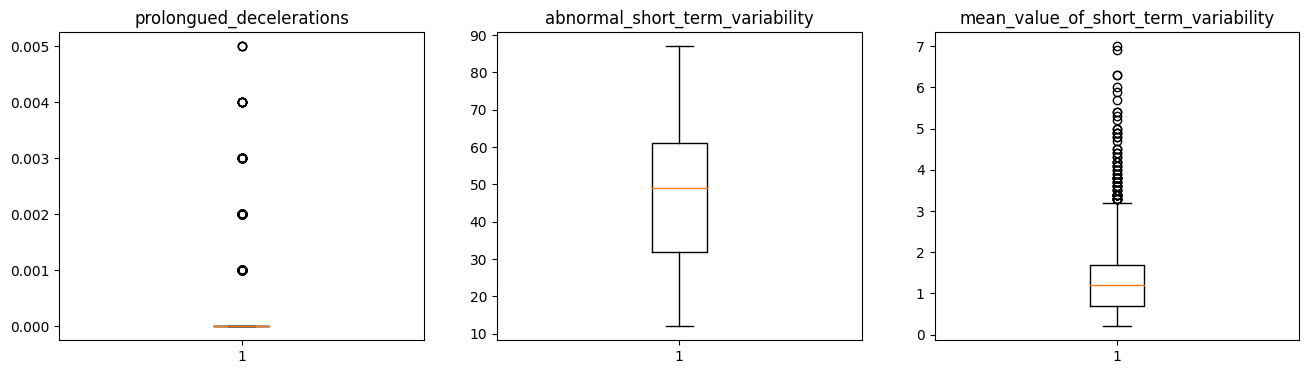

In [19]:
#Procedemos a ver cual de las varibles con las que afectan mas al modelo
values=["baseline value","accelerations","fetal_movement"]

values2=["uterine_contractions", "light_decelerations", "severe_decelerations"]

values3=["prolongued_decelerations", "abnormal_short_term_variability", "mean_value_of_short_term_variability"]

fig, axs= plt.subplots(1,3,figsize=(16,4))

fig2, axs2= plt.subplots(1,3,figsize=(16,4))

fig3, axs3= plt.subplots(1,3,figsize=(16,4))

count=0
for data in values:
  axs[count].boxplot(df[data])
  axs[count].set_title(data)
  count+=1



count=0
for data in values2:
  axs2[count].boxplot(df[data])
  axs2[count].set_title(data)
  count+=1

count=0
for data in values3:
  axs3[count].boxplot(df[data])
  axs3[count].set_title(data)
  count+=1

plt.show()

<Axes: >

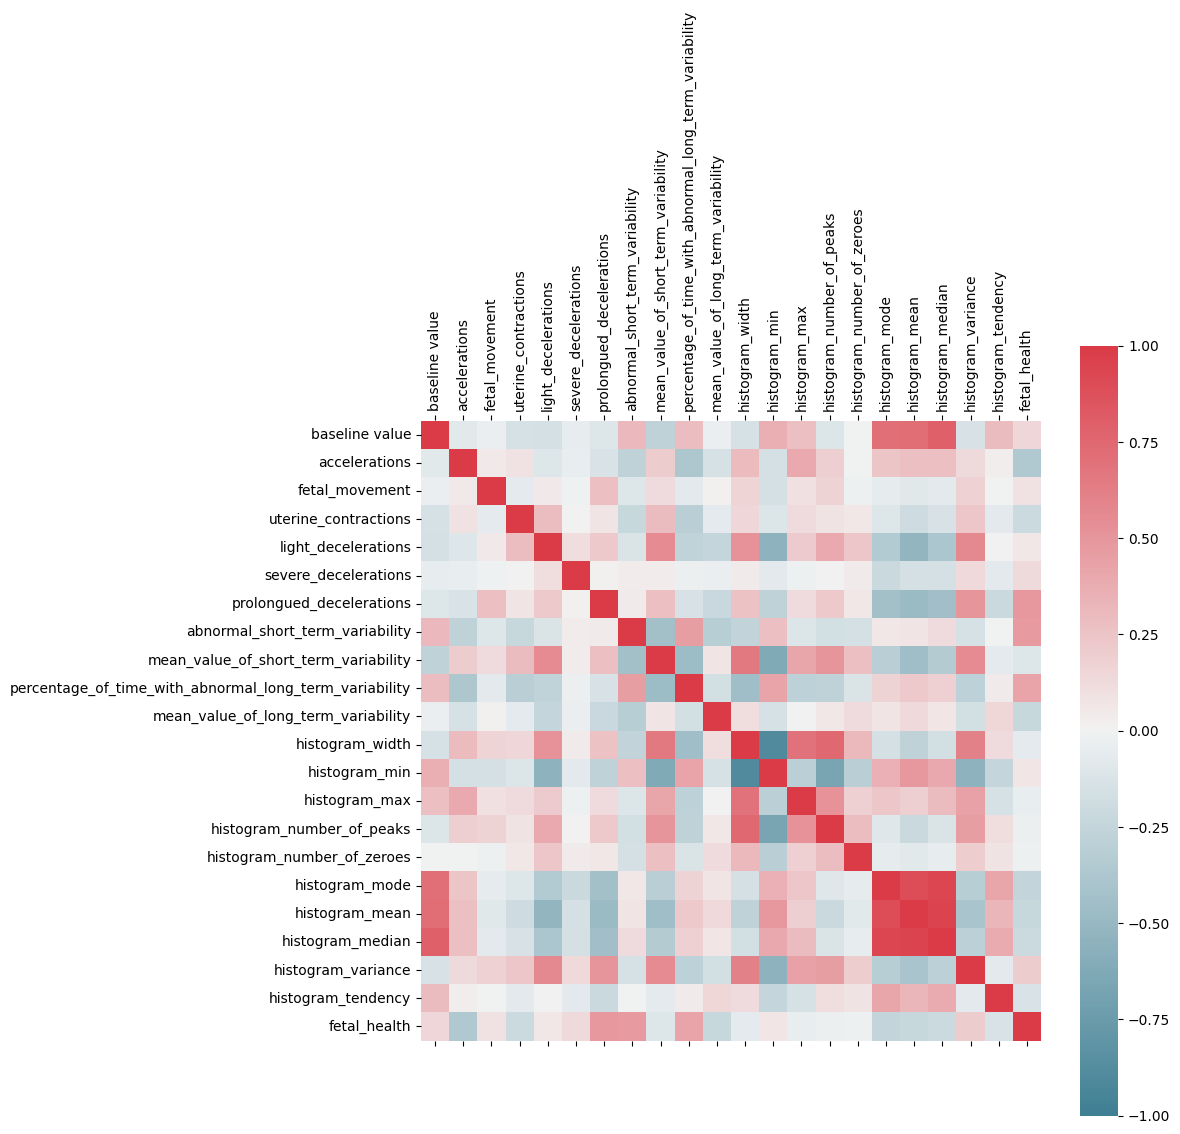

In [17]:
import seaborn as sns
#plt.matshow(df_heart.corr))
#plt. show()

corr = df.corr()
fig, ax = plt. subplots (figsize=(10, 10))
ax. matshow (corr)
plt.xticks (range(len (corr. columns)), corr.columns)
plt.yticks (range(len (corr. columns)), corr.columns)
sns.heatmap(corr,
            cmap=sns.diverging_palette(220,10,as_cmap=True),
            vmin=-1.0, vmax=1.0, square=True, ax=ax)

In [41]:
#En base a mi matriz de correlación elimino a las varibles que tienen mucha correlacion entre ellas y dejo a una
#En base a mi boxplot anterior elimino los valores de severe decelaration porque son todos 0
columnas_a_eliminar = ['histogram_mode', 'histogram_median','severe_decelerations','prolongued_decelerations']

# Eliminar las columnas
data = df.drop(columnas_a_eliminar, axis=1)
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,136.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,150.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,148.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,148.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,147.0,4.0,1.0,2.0


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1

X = data.drop('fetal_health', axis=1)  # Características
y = data['fetal_health']                # Variable objetivo

# Crear un estimador (modelo)
estimador = LinearRegression()

# Crear un selector RFE con el estimador y el número de características a seleccionar
selector = RFE(estimador, n_features_to_select=5, step=1)

# Ajustar el selector a los datos
selector = selector.fit(X, y)

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selector.support_)

# Imprimir el ranking de las características (1 = seleccionada, 2 = no seleccionada, etc.)
print("Ranking de características:")
print(selector.ranking_)

Características seleccionadas:
[False  True  True  True  True False False False False False False False
 False False False False  True]
Ranking de características:
[ 3  1  1  1  1  7  2  6 12 13 10  9 11  5  4  8  1]


In [43]:
### Este modelo es el desicion tree

X = data.drop('fetal_health', axis=1)  # Características
y = data['fetal_health']                # Variable objetivo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Entrena el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Evalúa la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.92018779342723


In [54]:
##### Este modelo es el random forest


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest:", accuracy)


scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Precisión de la validación cruzada:", scores)
print("Precisión media:", scores.mean())



Precisión del modelo de Random Forest: 0.9507042253521126
Precisión de la validación cruzada: [0.88967136 0.90352941 0.91058824 0.88705882 0.65647059]
Precisión media: 0.8494636840651755


In [55]:
# Inicializar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de KNN:", accuracy)


scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Precisión de la validación cruzada:", scores)
print("Precisión media:", scores.mean())

Precisión del modelo de KNN: 0.8732394366197183
Precisión de la validación cruzada: [0.82159624 0.80941176 0.88235294 0.80705882 0.67529412]
Precisión media: 0.7991427782380558


In [56]:
# Se puede observar que los modelos tienen mucho overfitting por lo que es necesario modificar los hiperparámetros